In [43]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
data = pd.read_csv("finishing.csv")
data.head()

,date,quarter,day,team,smv,over_time_per_worker,incentive,idle_time,no_of_workers,actual_productivity,targeted_productivity
0,2015-01-01,Quarter1,Thursday,1,3.94,2.0,0.0,0.0,8.0,0.886500,0.75
1,2015-01-01,Quarter1,Thursday,2,3.94,2.0,0.0,0.0,8.0,0.755167,0.75
2,2015-01-01,Quarter1,Thursday,10,3.94,2.0,0.0,0.0,8.0,0.705917,0.65
3,2015-01-01,Quarter1,Thursday,8,2.90,2.0,0.0,0.0,8.0,0.676667,0.75
4,2015-01-01,Quarter1,Thursday,4,3.94,2.0,0.0,0.0,18.0,0.593056,0.75


In [45]:
data.shape

(506, 11)

In [46]:
# data[data["quarter"] == "Quarter5"].groupby("team")["no_of_workers"].agg("count")
data = data[data["quarter"] != "Quarter5"]

In [47]:
# wip = 0 for all hence dropped
data.date = pd.to_datetime(data.date.apply(lambda x: x.strip())) # Converting date to Date-Time format
# data.department = data.department.apply(lambda x: x.rstrip()) # Ignoring trailing white-spaces

# Productivity trends

## General Productivity trend

In [48]:
team_data = data[["date","team","targeted_productivity","actual_productivity"]].groupby("team")

In [49]:
team_data.get_group(3).head()

,date,team,targeted_productivity,actual_productivity
10,2015-01-03,3,0.75,0.945278
16,2015-01-04,3,0.75,0.991389
28,2015-01-05,3,0.75,0.875391
37,2015-01-06,3,0.75,0.899167
46,2015-01-07,3,0.75,0.830000


Correlation for team 1 :  0.5049189024458418
Correlation for team 2 :  0.35393324348395444
Correlation for team 3 :  0.42267773338112535
Correlation for team 4 :  -0.21766396542065536
Correlation for team 5 :  0.07494574785889524
Correlation for team 6 :  0.004746124780526344
Correlation for team 7 :  -0.06729573687921826
Correlation for team 8 :  -0.15555555332042567
Correlation for team 9 :  0.3794039927321332
Correlation for team 10 :  0.36732285948165
Correlation for team 11 :  0.37798735812337153
Correlation for team 12 :  0.4062109907862634


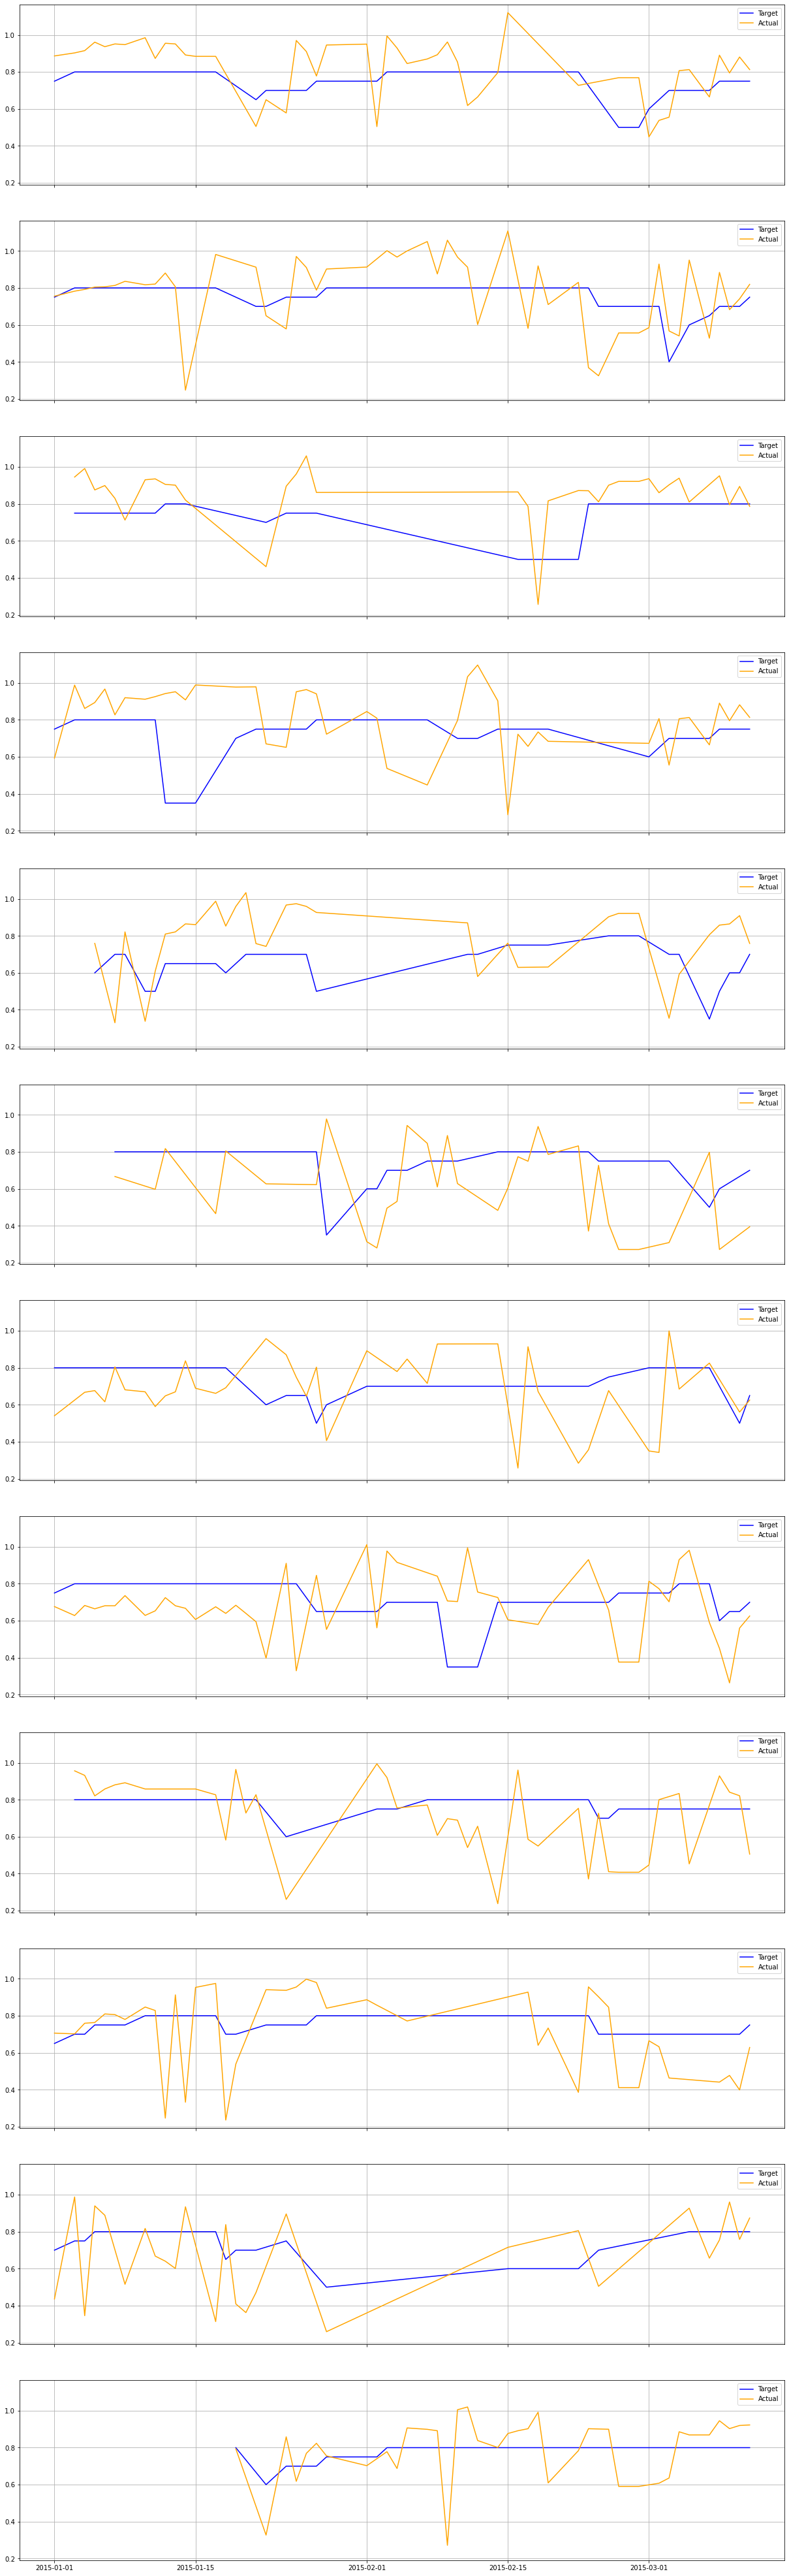

In [50]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)
for team in range(1,13):
    t = team_data.get_group(team)[["date","targeted_productivity","actual_productivity"]]
    t = t.sort_values(by="date")
    t
    ax[team-1].plot_date(t["date"],t["targeted_productivity"], "b")
    ax[team-1].plot_date(t["date"],t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    # ax[team-1].title = "Team: "+(str)(team)
    print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

## Most Productive Team

In [51]:
df = data[["team","targeted_productivity","actual_productivity"]].copy()
df["diff^2"] = numpy.square(df["actual_productivity"] - df["targeted_productivity"])
df["gmean"] = 1+(df["actual_productivity"] - df["targeted_productivity"])/df["targeted_productivity"] 

In [52]:
from scipy import stats

def geo_mean(series):
    return stats.gmean(series)

In [53]:
df.groupby("team")["gmean"].agg(geo_mean).sort_values(ascending = False)

team
5     1.166235
3     1.145743
4     1.132860
1     1.083338
2     0.999234
12    0.986199
8     0.941084
10    0.894677
7     0.892469
9     0.880827
11    0.857487
6     0.780013
Name: gmean, dtype: float64

Most Productive are: 5,4,3,1,2

Top performers are: 5,3,4,1,2

In [55]:
df.groupby(["team"])["diff^2"].agg(mean).sort_values()

team
1     0.022631
12    0.023425
3     0.031571
2     0.034418
9     0.039148
10    0.044558
7     0.045439
11    0.046871
8     0.050113
5     0.055678
4     0.060846
6     0.072833
Name: diff^2, dtype: float64

Top 5 most consistent teams are: 1,12,3,2,9?


## Productivity across Quarters

In [56]:
df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df

<ipython-input-56-abc288502adc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")


,targeted_productivity,actual_productivity
quarter,,
Quarter1,0.747315,0.758482
Quarter2,0.738435,0.764824
Quarter3,0.741358,0.735793
Quarter4,0.721759,0.713400


Correlation: 0.7942420432583989


Text(0, 0.5, 'productivity')

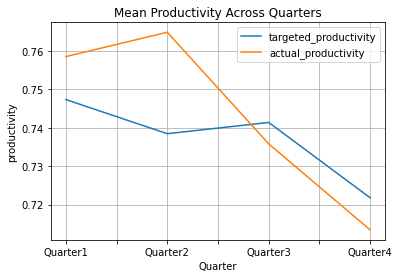

In [57]:
print("Correlation:",df["actual_productivity"].corr(df["targeted_productivity"]))
df.plot(title = "Mean Productivity Across Quarters", grid = True)
xlabel("Quarter")
ylabel("productivity")

# Productivity across Quarters by team

In [58]:
df = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df.head()

<ipython-input-58-7daa3eb1d7ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
team quarter                                             
1    Quarter1               0.750000             0.804149
     Quarter2               0.787500             0.860675
     Quarter3               0.762500             0.848522
     Quarter4               0.677778             0.788581
2    Quarter1               0.723529             0.810896

Correlation for team 1 :  0.874624365213575
Correlation for team 2 :  0.4587606914959392
Correlation for team 3 :  0.9829280408617879
Correlation for team 4 :  -0.5177918537140829
Correlation for team 5 :  0.8899197879850123
Correlation for team 6 :  0.84263300038537
Correlation for team 7 :  0.5637956003146329
Correlation for team 8 :  0.1051074878922491
Correlation for team 9 :  0.8793155053606929
Correlation for team 10 :  -0.3575779991835423
Correlation for team 11 :  0.777001398533402
Correlation for team 12 :  0.9222716361978377


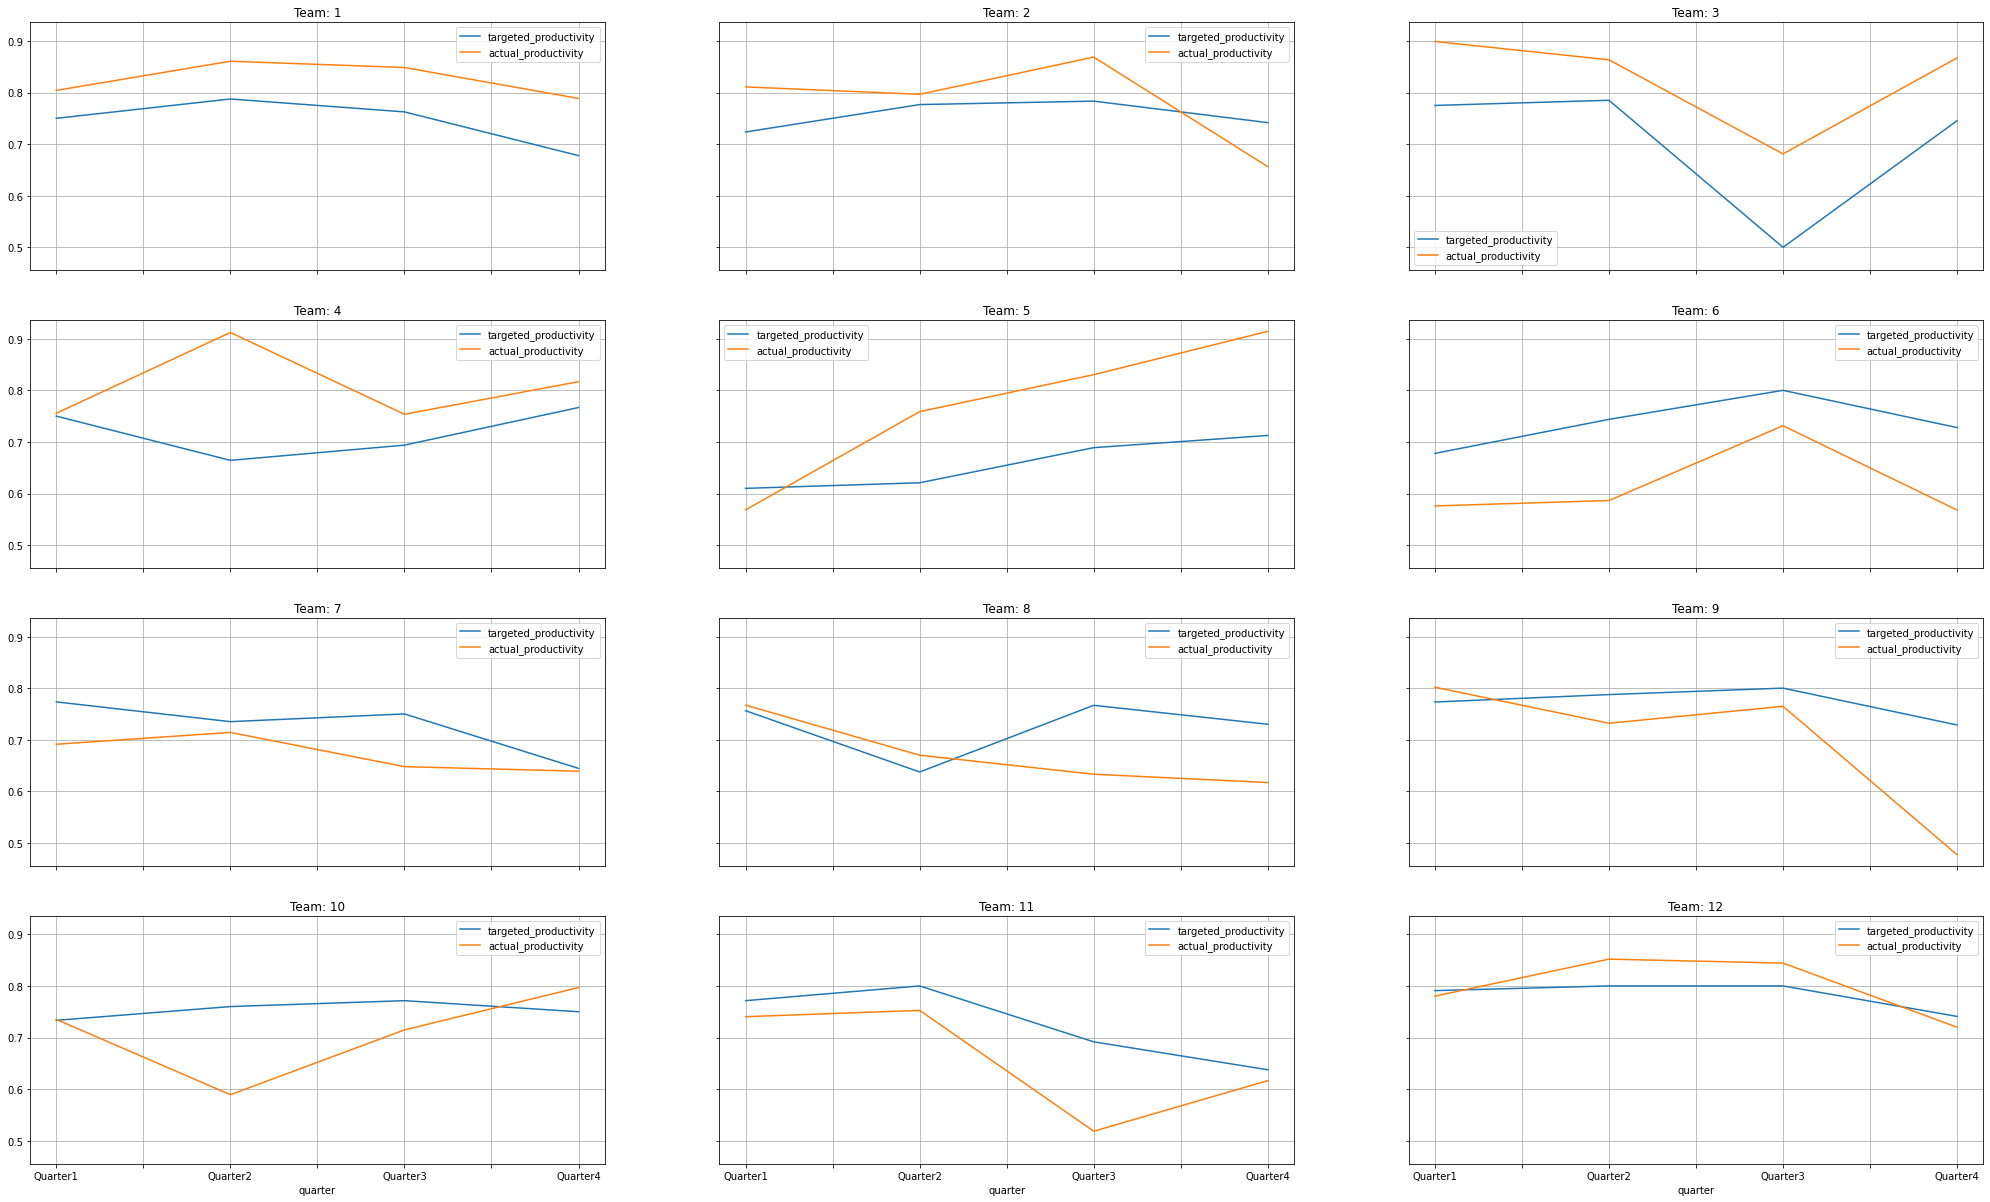

In [59]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# Team size v/s Productivity

In [60]:
df = data[["no_of_workers","targeted_productivity","actual_productivity"]].sort_values(by="no_of_workers")
df.head()

,no_of_workers,targeted_productivity,actual_productivity
97,2.0,0.80,0.951420
301,2.0,0.70,0.870000
321,2.0,0.75,0.760833
310,2.0,0.70,0.580000
186,4.0,0.80,0.329545


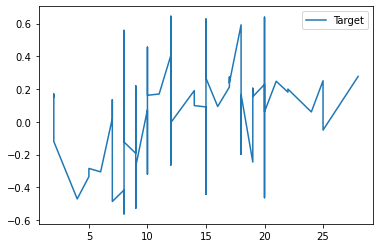

In [61]:
# plot(df["no_of_workers"],df["targeted_productivity"])
# plot(df["no_of_workers"],df["actual_productivity"])
plot(df["no_of_workers"],df["actual_productivity"]-df["targeted_productivity"])
legend(["Target","Actual","Diff"])
plot.grid = True


- Bucket by team sizes and find mean difference: Gives us an approximate relation b/w team size and ability to reach target

No Clear relationship

## Overtime vs Productivity

# Incentive trends
## General Incentive trend


## Incentive per quarter
## Incentive per quarter per team
## Overtime vs Incentive

In [62]:
df_incentive = data.groupby(["team","quarter"])["incentive"].agg("mean")
df_incentive.head()

team  quarter 
1     Quarter1    0.0
      Quarter2    7.5
      Quarter3    0.0
      Quarter4    0.0
2     Quarter1    0.0
Name: incentive, dtype: float64

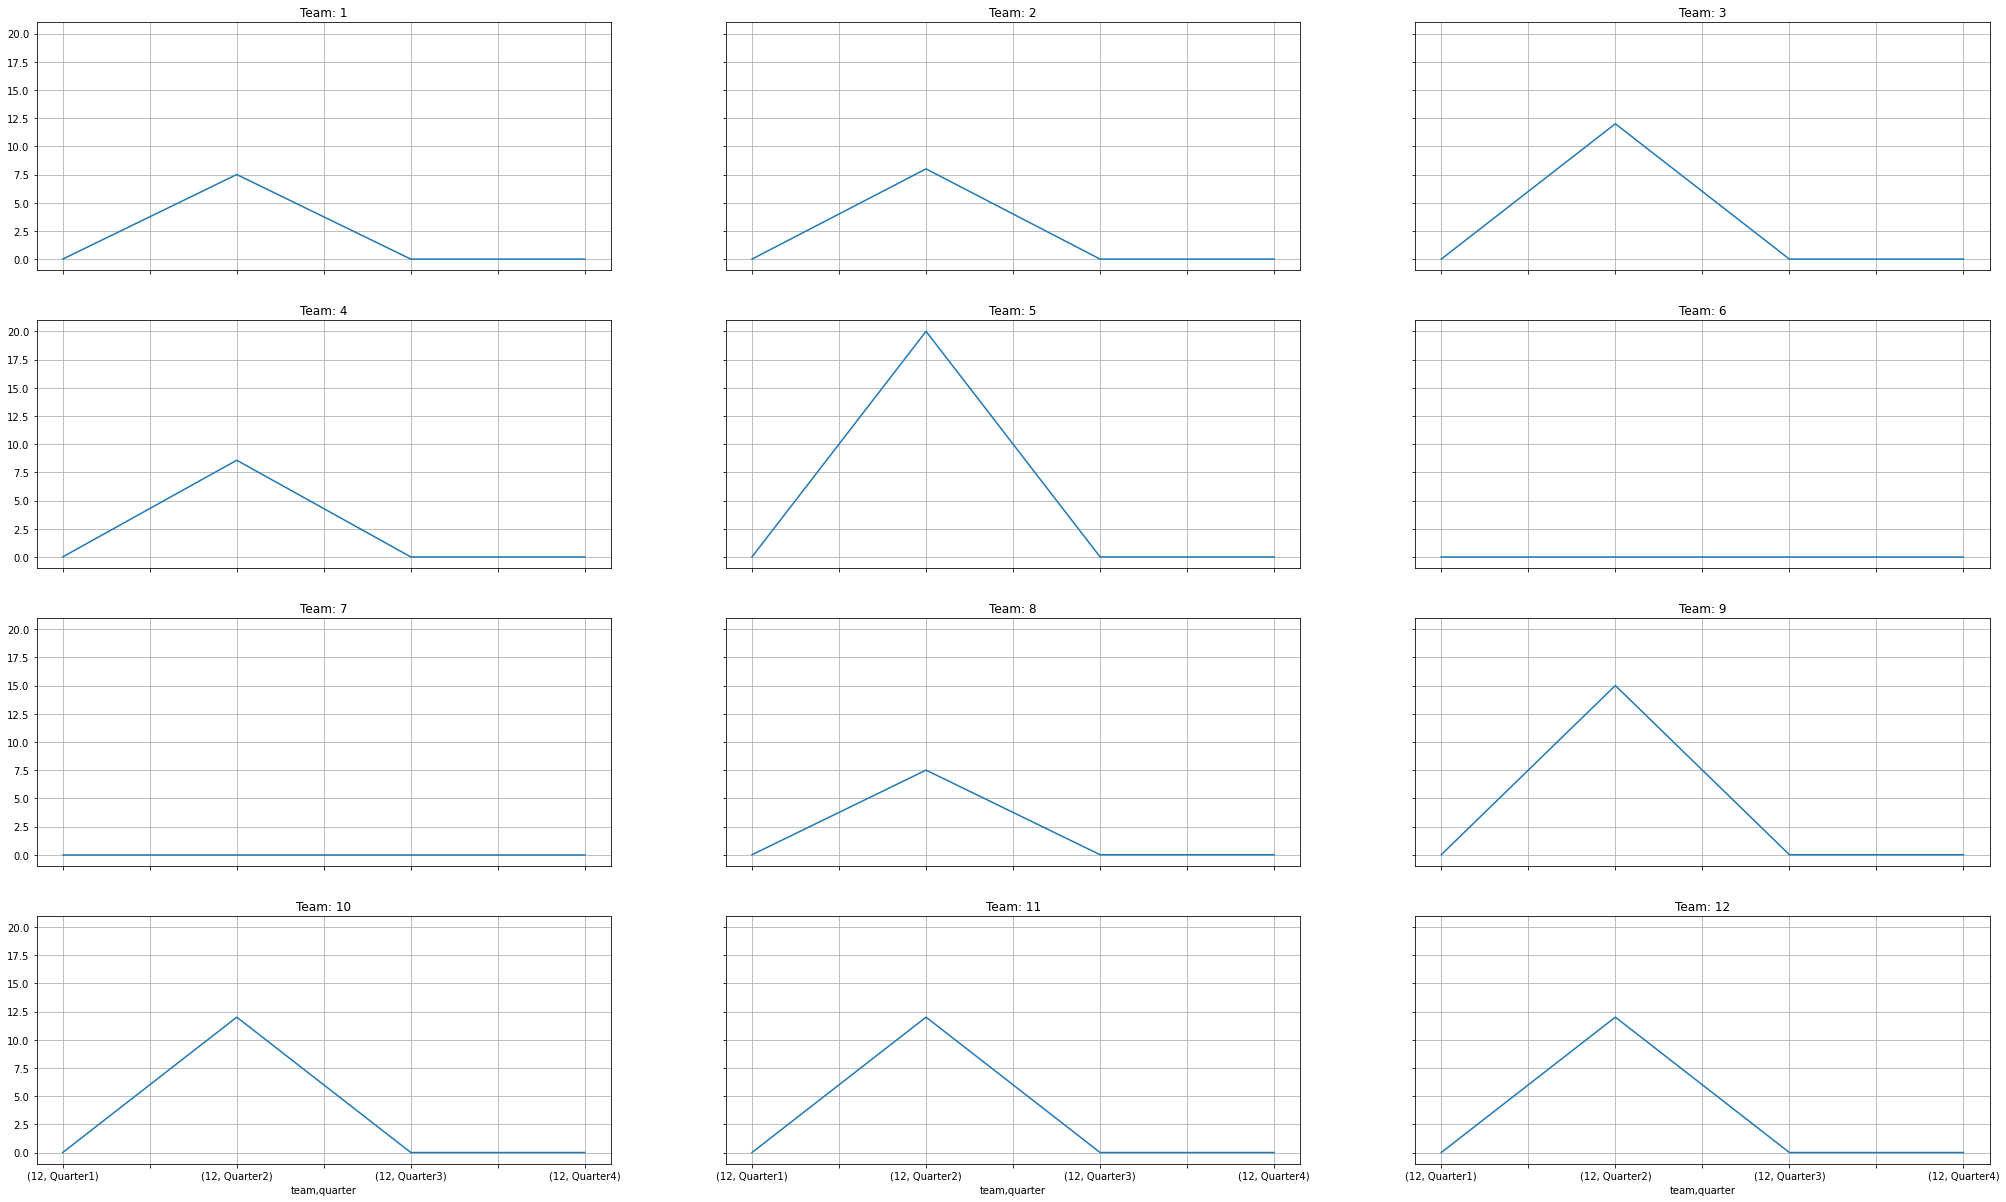

In [63]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df_incentive.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)

In [64]:
df


,no_of_workers,targeted_productivity,actual_productivity
97,2.0,0.80,0.951420
301,2.0,0.70,0.870000
321,2.0,0.75,0.760833
310,2.0,0.70,0.580000
186,4.0,0.80,0.329545
...,...,...,...
259,25.0,0.70,0.915767
409,25.0,0.80,0.936356
454,25.0,0.80,0.825444
162,25.0,0.70,0.649662
